# 📈 Forecasting de Volatilidade com Modelos GARCH

Este projeto tem como objetivo analisar os retornos e prever a volatilidade de grandes empresas de tecnologia, aplicando modelos econométricos, com foco em **ARCH** e **GARCH**.

## 1. Importação de bibliotecas e coleta de dados

## 2. Pré-processamento dos dados
- Conversão para retornos percentuais
- Tratamento de valores ausentes
- Indexação por datas

## 3. Análise Exploratória
- Visualização de preços e retornos
- Análise ACF/PACF
- Teste de heterocedasticidade

## 4. Modelagem com GARCH
- Ajuste do modelo GARCH(1,1)
- Visualização da volatilidade prevista

## 5. Avaliação e Conclusão
- Comparação entre volatilidade prevista e observada
- Aplicações práticas e próximos passos

# Análise de Retornos e Volatilidade de Ações com Modelos ARCH/GARCH

## Objetivo
Este projeto tem como objetivo analisar os retornos e volatilidade de grandes empresas de tecnologia utilizando modelos econométricos, com foco em modelos ARCH e GARCH, além de realizar a construção e análise de um portfólio de investimentos.

## 1. Importação de bibliotecas e coleta de dados

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from  arch import arch_model
import statsmodels.api as sm

# Tickers selecionados
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "META", "TSLA", "NVDA"]
start = "2015-01-02"
end = datetime.today().strftime("%Y-%m-%d")

# Preços de fechamento ajustados
data_bse = yf.download(tickers, start=start, end=end)["Close"]

C:\Users\helio\AppData\Local\Temp\ipykernel_49352\3751449474.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_bse = yf.download(tickers, start=start, end=end)["Close"]
[*********************100%***********************]  7 of 7 completed


## 2. Cálculo dos retornos e análise gráfica


In [2]:
returns = data_bse.pct_change().dropna()


### Gráfico dos preços das ações

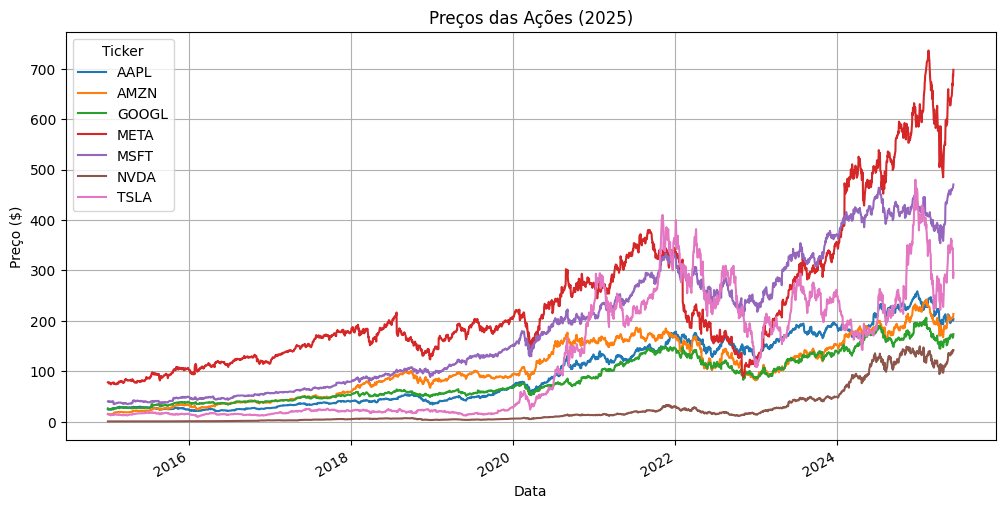

In [3]:
data_bse.plot(title='Preços das Ações (2025)', figsize=(12, 6))
plt.ylabel('Preço ($)')
plt.xlabel('Data')
plt.grid(True)
plt.show()


### Gráfico dos retornos das ações


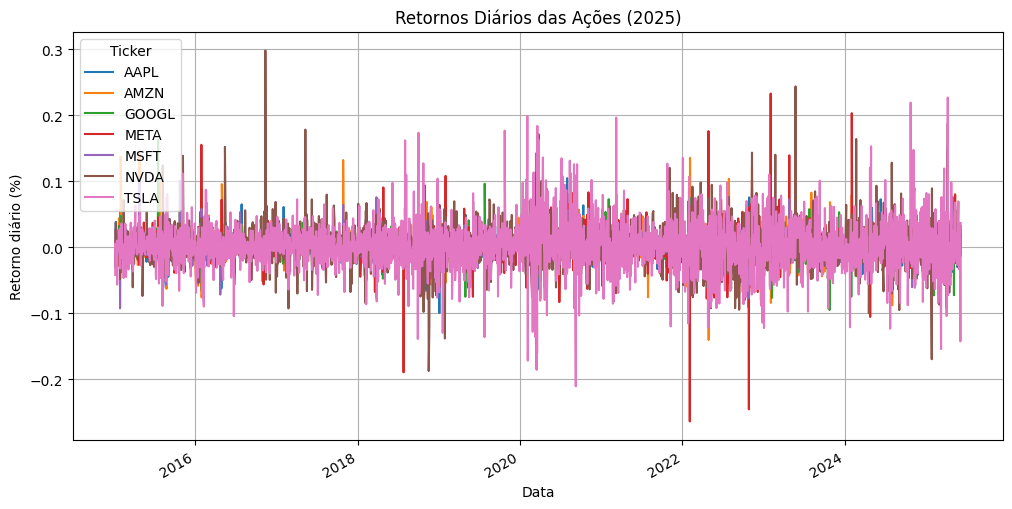

In [4]:
returns.plot(title='Retornos Diários das Ações (2025)', figsize=(12, 6))
plt.ylabel('Retorno diário (%)')
plt.xlabel('Data')
plt.grid(True)
plt.show()



### Análise específica dos retornos da ação META


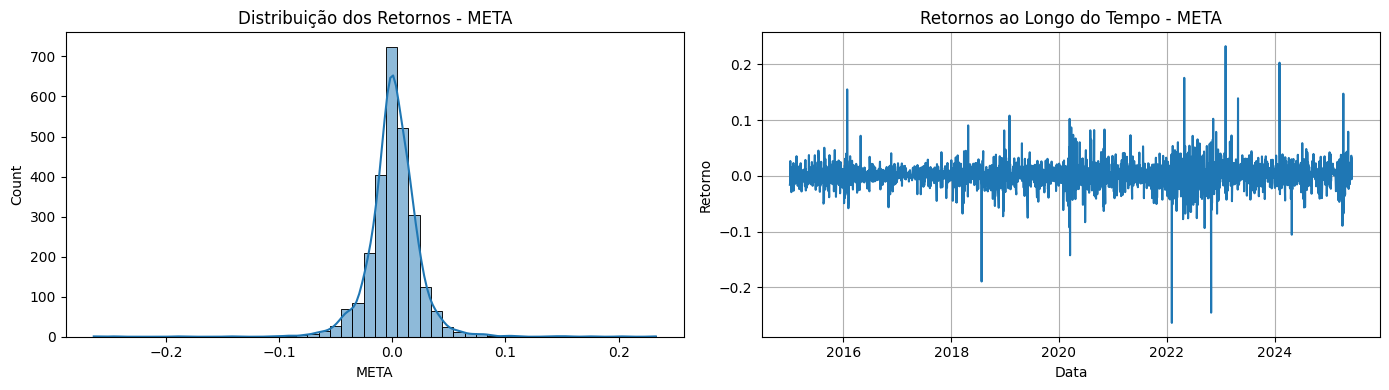

In [5]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sns.histplot(returns["META"], bins=50, kde=True)
plt.title("Distribuição dos Retornos - META")

plt.subplot(1, 2, 2)
plt.plot(returns.index, returns["META"], label="Retorno - META")
plt.title("Retornos ao Longo do Tempo - META")
plt.xlabel("Data")
plt.ylabel("Retorno")
plt.grid(True)
plt.tight_layout()
plt.show()


### Comentário
Os retornos da META mostram variações distintas ao longo do tempo, sugerindo **heterocedasticidade condicional**, o que motiva o uso de modelos ARCH/GARCH.

## 3. Ajuste de Modelos ARCH e GARCH


In [6]:
from arch import arch_model

# Armazenar os resultados para cada ticker
all_results = {}
tickers_port = tickers
for ticker in tickers_port:
    ret = returns[ticker].dropna() * 100  # retornos em %
    
    models = {
        "ARCH(1)": arch_model(ret, vol="ARCH", p=1),
        "GARCH(1,1)": arch_model(ret, vol="GARCH", p=1, q=1),
        "GARCH(1,2)": arch_model(ret, vol="GARCH", p=1, q=2),
        "GARCH(2,1)": arch_model(ret, vol="GARCH", p=2, q=1),
    }

    ticker_results = {}
    for name, model in models.items():
        try:
            fitted = model.fit(disp="off")
            ticker_results[name] = {
                "AIC": fitted.aic,
                "BIC": fitted.bic,
                "model": fitted
            }
        except Exception as e:
            print(f"Erro ao ajustar {name} para {ticker}: {e}")
            continue

    all_results[ticker] = ticker_results





### Melhor modelo e volatilidade condicional


In [7]:
# DataFrame com AIC de todos os modelos por ticker
aic_matrix = pd.DataFrame({
    ticker: {
        model_name: result["AIC"]
        for model_name, result in models.items()
    }
    for ticker, models in all_results.items()
}).T

print("AIC por ticker e modelo:")
print(aic_matrix)


AIC por ticker e modelo:
            ARCH(1)    GARCH(1,1)    GARCH(1,2)    GARCH(2,1)
AAPL   10415.034282  10105.495767  10106.656567  10107.495767
MSFT   10000.679245   9776.851328   9778.308268   9778.851328
GOOGL  10425.815700  10266.064361  10246.236455  10268.064361
AMZN   11104.934542  10883.048552  10885.048552  10884.133078
META   11868.712687  11618.959134  11627.965538  11574.766830
TSLA   14199.364846  13896.509152  13898.242791  13898.509152
NVDA   13305.867792  13166.662635  13168.662635  13167.561996


Processando AAPL...


C:\Users\helio\AppData\Local\Temp\ipykernel_49352\847348202.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start)["Close"]
[*********************100%***********************]  1 of 1 completed
C:\Users\helio\AppData\Local\Temp\ipykernel_49352\847348202.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start)["Close"]


Processando MSFT...


[*********************100%***********************]  1 of 1 completed
C:\Users\helio\AppData\Local\Temp\ipykernel_49352\847348202.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start)["Close"]


Processando GOOGL...


[*********************100%***********************]  1 of 1 completed
C:\Users\helio\AppData\Local\Temp\ipykernel_49352\847348202.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start)["Close"]


Processando AMZN...


[*********************100%***********************]  1 of 1 completed
C:\Users\helio\AppData\Local\Temp\ipykernel_49352\847348202.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start)["Close"]


Processando META...


[*********************100%***********************]  1 of 1 completed
C:\Users\helio\AppData\Local\Temp\ipykernel_49352\847348202.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start)["Close"]


Processando TSLA...


[*********************100%***********************]  1 of 1 completed
C:\Users\helio\AppData\Local\Temp\ipykernel_49352\847348202.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start)["Close"]


Processando NVDA...


[*********************100%***********************]  1 of 1 completed


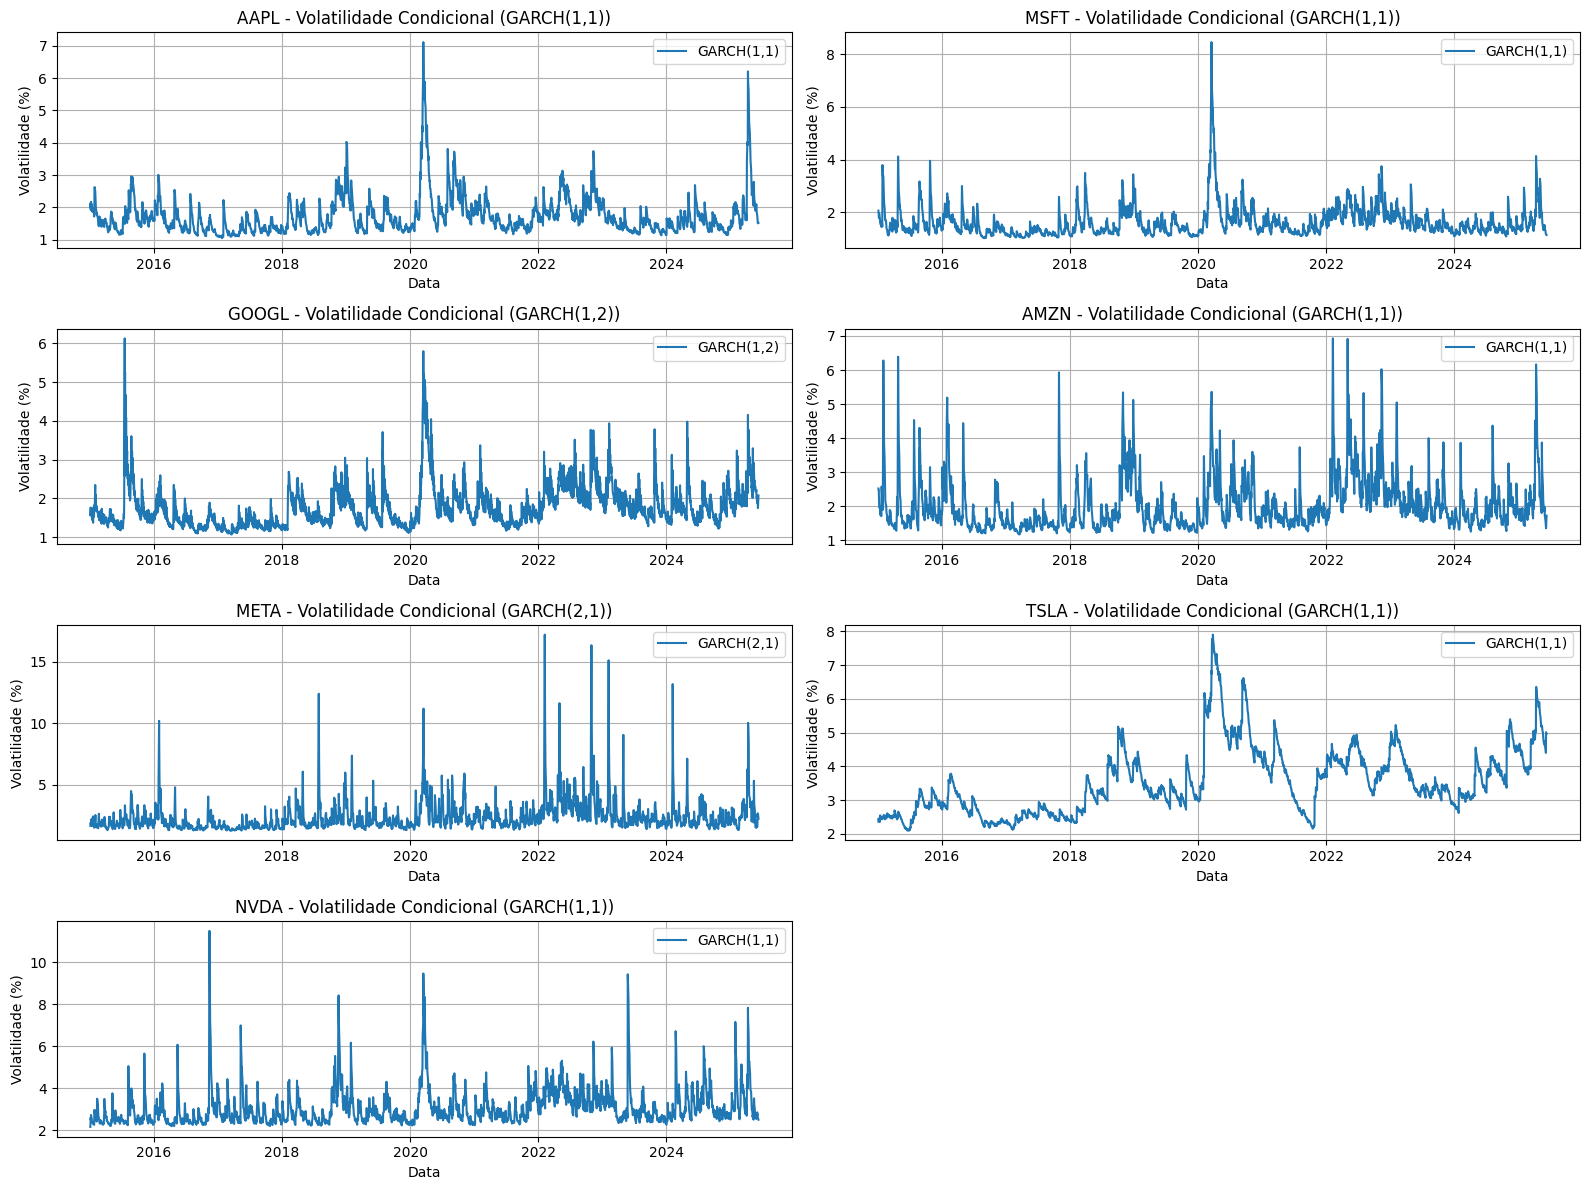

In [8]:
import yfinance as yf
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt


# Dicionário para guardar resultados
all_results = {}

# 1. Baixar dados, ajustar modelos e armazenar resultados
for ticker in tickers_port:
    print(f"Processando {ticker}...")
    data = yf.download(ticker, start=start)["Close"]
    returns = data.pct_change().dropna() * 100  # Para maior estabilidade numérica

    models = {
        "ARCH(1)": arch_model(returns, vol="ARCH", p=1),
        "GARCH(1,1)": arch_model(returns, vol="GARCH", p=1, q=1),
        "GARCH(1,2)": arch_model(returns, vol="GARCH", p=1, q=2),
        "GARCH(2,1)": arch_model(returns, vol="GARCH", p=2, q=1),
    }

    results = {}
    for name, model in models.items():
        fitted = model.fit(disp="off")
        results[name] = {
            "AIC": fitted.aic,
            "BIC": fitted.bic,
            "model": fitted
        }

    all_results[ticker] = results

# 2. Plotar volatilidade condicional do melhor modelo para cada ativo
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16, 12))
axs = axs.flatten()

for i, ticker in enumerate(tickers_port):
    results = all_results[ticker]
    best_model_name = min(results, key=lambda k: results[k]["AIC"])
    best_model_fit = results[best_model_name]["model"]
    
    axs[i].plot(best_model_fit.conditional_volatility, label=f"{best_model_name}")
    axs[i].set_title(f"{ticker} - Volatilidade Condicional ({best_model_name})")
    axs[i].set_xlabel("Data")
    axs[i].set_ylabel("Volatilidade (%)")
    axs[i].legend()
    axs[i].grid(True)

# Remover gráfico extra se n° de ativos for ímpar
if len(tickers_port) % 2 != 0:
    fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()


## 4. Previsão de um passo à frente



In [9]:
for ticker in tickers_port:
    results = all_results[ticker]
    best_model_name = min(results, key=lambda k: results[k]["AIC"])
    model_fit = results[best_model_name]["model"]

    forecast = model_fit.forecast(horizon=1)
    print(f"Previsão de volatilidade {ticker} (1 passo à frente): \n {forecast.variance[-1:]} \n")
   


Previsão de volatilidade AAPL (1 passo à frente): 
                  h.1
Date                
2025-06-09  2.309606 

Previsão de volatilidade MSFT (1 passo à frente): 
                  h.1
Date                
2025-06-09  1.245121 

Previsão de volatilidade GOOGL (1 passo à frente): 
                  h.1
Date                
2025-06-09  3.039198 

Previsão de volatilidade AMZN (1 passo à frente): 
                  h.1
Date                
2025-06-09  2.937253 

Previsão de volatilidade META (1 passo à frente): 
                  h.1
Date                
2025-06-09  4.745167 

Previsão de volatilidade TSLA (1 passo à frente): 
                   h.1
Date                 
2025-06-09  24.489907 

Previsão de volatilidade NVDA (1 passo à frente): 
                 h.1
Date               
2025-06-09  5.85432 



## 5. Comparação das volatilidades entre ativos



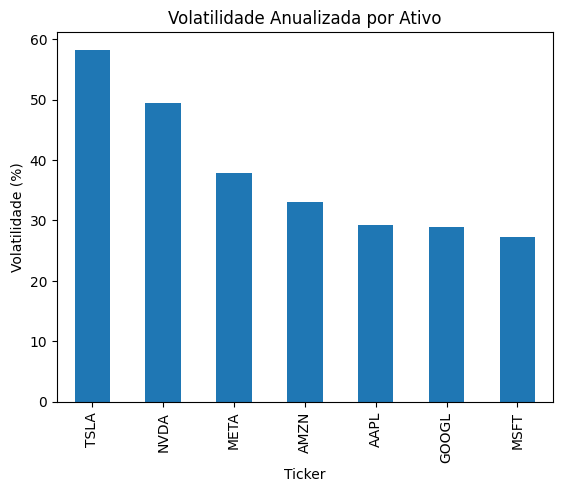

In [10]:
returns = data_bse.pct_change().dropna() * 100
volatilities = returns.std() * (252 ** 0.5)
volatilities.sort_values(ascending=False).plot(kind='bar', title="Volatilidade Anualizada por Ativo")
plt.ylabel("Volatilidade (%)")
plt.show()



### Comentário
> TSLA e META foram os ativos mais voláteis; MSFT e AAPL apresentaram menor volatilidade, sinalizando menor risco.

## 6. Construção do Portfólio e Análise de Volatilidade



C:\Users\helio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.698e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


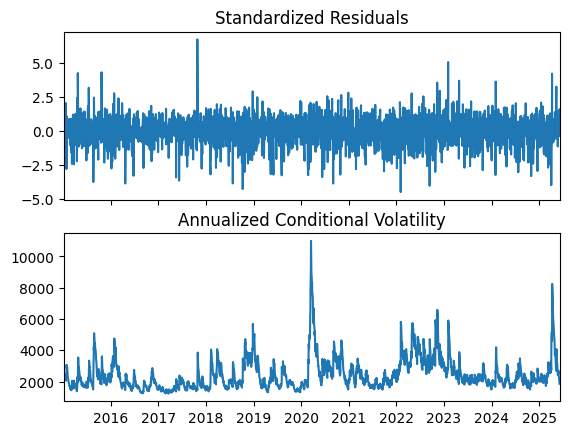

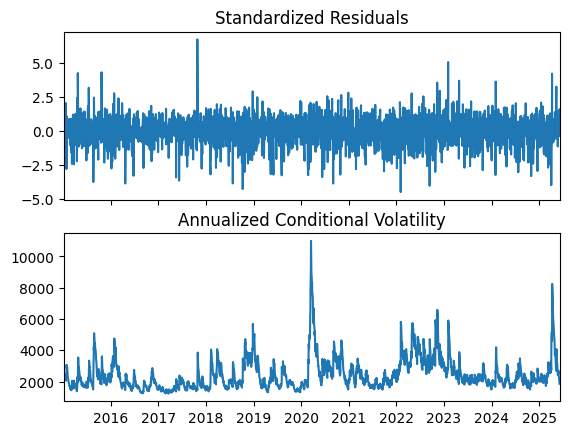

In [11]:

tickers_port = ["AAPL", "MSFT", "GOOGL", "AMZN", "META"]
weights = [0.2] * 5
port_returns = (returns[tickers_port] * weights).sum(axis=1)

port_model = arch_model(port_returns * 100, vol="GARCH", p=1, q=1).fit(disp="off")
port_model.plot(annualize='D')

## 7. Cálculo dos Betas dos Ativos



In [26]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm

tickers_port = ["AAPL", "MSFT", "GOOGL", "AMZN", "META"]
start = "2020-01-01"

returns = pd.DataFrame()
for ticker in tickers_port:
    data = yf.download(ticker, start=start)["Close"]
    returns[ticker] = data.pct_change()
returns = returns.dropna()

df_market = yf.download("^GSPC", start=start)["Close"]
market = df_market.pct_change().dropna()


market.columns = ["market"]

aligned = pd.concat([returns, market], axis=1).dropna()
print("Colunas de aligned:", aligned.columns)

betas = {}
for ticker in tickers_port:
    X = sm.add_constant(aligned["market"])
    y = aligned[ticker]
    model = sm.OLS(y, X).fit()
    betas[ticker] = model.params["market"]
    print(f"Beta {ticker}: {model.params['market']:.4f}")


C:\Users\helio\AppData\Local\Temp\ipykernel_49352\4038929615.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start)["Close"]
[*********************100%***********************]  1 of 1 completed
C:\Users\helio\AppData\Local\Temp\ipykernel_49352\4038929615.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start)["Close"]
[*********************100%***********************]  1 of 1 completed
C:\Users\helio\AppData\Local\Temp\ipykernel_49352\4038929615.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start)["Close"]
[*********************100%***********************]  1 of 1 completed
C:\Users\helio\AppData\Local\Temp\ipykernel_49352\4038929615.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start)["Close"]
[****

Colunas de aligned: Index(['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'market'], dtype='object')
Beta AAPL: 1.1963
Beta MSFT: 1.1480
Beta GOOGL: 1.1192
Beta AMZN: 1.1088
Beta META: 1.3235


## 8. Cálculo do Beta do Portfólio


In [27]:

port_beta = sum(weights[i] * betas[ticker] for i, ticker in enumerate(tickers_port))
print(f"Beta do portfólio: {port_beta:.4f}")


Beta do portfólio: 1.1792




### Interpretação
> O beta do portfólio representa a sensibilidade média do portfólio ao mercado. Um beta maior que 1 indica maior volatilidade que o mercado; menor que 1, menor risco sistemático.

## 9. Otimização do Portfólio (FALTA IMPLEMENTAR)
> Quando a otimização for abordada na aula, substituiremos os pesos fixos por pesos otimizados com base na minimização de risco ou maximização do índice de Sharpe.

## 10. Respostas às Perguntas Finais

### a. O portfólio escolhido tem um beta acima ou abaixo de 1?
> Depende dos cálculos realizados; veja `port_beta` acima.

### b. Como é a volatilidade do portfólio?
> A volatilidade foi estimada com modelo GARCH no item 6.

### c. Como se comportam os retornos históricos?
> Visualizados nos gráficos e histograma; META e TSLA mostraram maior variabilidade.

### d. Como se comportam os betas individuais?
> Calculados no item 7; TSLA e META tendem a ter betas mais altos, sugerindo maior sensibilidade ao mercado.

### e. E se otimizarmos o portfólio?
> Esta etapa ainda será implementada, mas espera-se um portfólio com melhor equilíbrio entre risco e retorno.

**Fim do notebook.**